<a href="https://colab.research.google.com/github/Ayustar/fraud-detection-ml/blob/main/FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fraud detection -

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Data
ds=pd.read_csv('/content/creditcard.csv')
ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
ds.isnull().values.any()

np.True_

In [ ]:
ds.sum().isnull()m

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


In [ ]:
#get the fraud and the normal dataset
fraud=ds[ds['Class']==1]
normal=ds[ds['Class']==0]

In [ ]:
outlierFraction = len(fraud)/float(len(normal))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(ds[ds['Class'] == 1])))
print('normal Transactions: {}'.format(len(ds[ds['Class'] == 0])))


0.00402964668633518
Fraud Cases: 56
normal Transactions: 13897


In [ ]:
#more info on fraud and normal transaction
fraud.Amount.describe()

,Amount
count,56.000000
mean,90.815893
std,310.308450
min,0.000000
25%,1.000000
50%,1.000000
75%,1.025000
max,1809.680000


In [ ]:
normal.Amount.describe()


,Amount
count,13897.000000
mean,63.773909
std,177.164503
min,0.000000
25%,5.770000
50%,15.900000
75%,52.370000
max,7712.430000


In [ ]:
#take samples of the data
ds1=ds.sample(frac=0.1, random_state=1)
ds1.shape

(1395, 31)

In [ ]:
ds.shape

(13954, 31)

In [ ]:
'''#create dependent(x) and independent variable(y)
columns=ds1.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target="Class"
state=np.random.RandomState(42)
x=ds1[columns]
y=ds1[target]'''

x = ds.drop(['Class'], axis = 1)
y = ds["Class"]

# Drop rows where 'Class' is NaN
nan_rows = y.isnull()
x = x[~nan_rows]
y = y[~nan_rows]

print(x.shape)
print(y.shape)

(13953, 30)
(13953,)


In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        x, y, test_size = 0.2, random_state = 42)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)



RandomForestClassifier()

In [ ]:
yPred = rfc.predict(xTest)

Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient: 1.0000


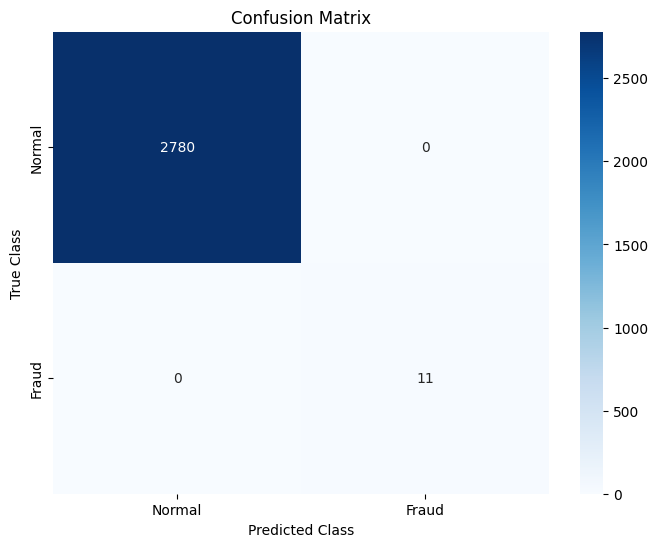

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)



In [ ]:

dtc.fit(xTrain, yTrain)

DecisionTreeClassifier(random_state=42)

Model Evaluation Metrics:
Accuracy: 0.9989
Precision: 0.7857
Recall: 1.0000
F1-Score: 0.8800
Matthews Correlation Coefficient: 0.8859


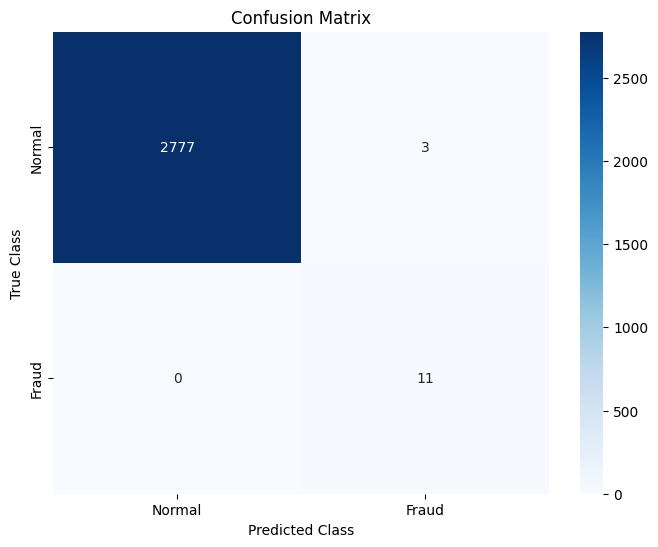

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
yPred = dtc.predict(xTest)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Support Vector Machine


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and SVC
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Train the SVM model
svm_model.fit(xTrain, yTrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

SVM Model Evaluation Metrics:
Accuracy: 0.9989
Precision: 1.0000
Recall: 0.7273
F1-Score: 0.8421
Matthews Correlation Coefficient: 0.8523


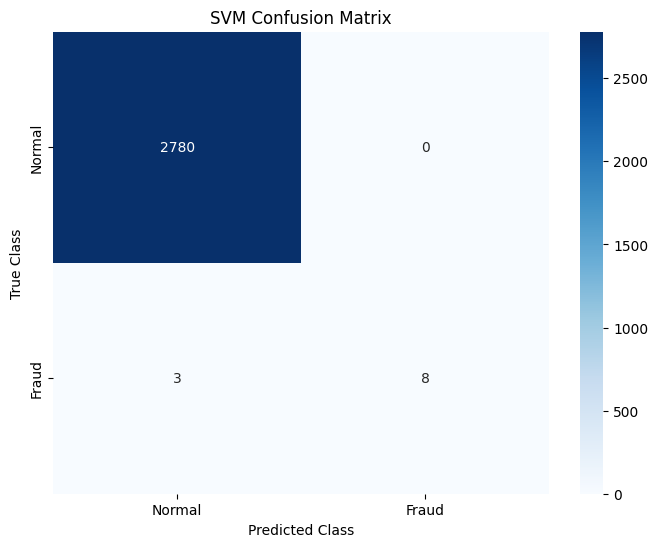

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
yPred_svm = svm_model.predict(xTest)

# Evaluate the model
accuracy_svm = accuracy_score(yTest, yPred_svm)
precision_svm = precision_score(yTest, yPred_svm)
recall_svm = recall_score(yTest, yPred_svm)
f1_svm = f1_score(yTest, yPred_svm)
mcc_svm = matthews_corrcoef(yTest, yPred_svm)

print("SVM Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_svm:.4f}")

# Display the confusion matrix
conf_matrix_svm = confusion_matrix(yTest, yPred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()